## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

W0615 13:34:43.365259 140441147398016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 13:34:43.412530 140441147398016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 13:34:43.420021 140441147398016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


W0615 13:34:45.465825 140441147398016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 13:34:45.498819 140441147398016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0615 13:34:45.660825 140441147398016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0615 13:34:45.714864 140441147398016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/step - loss: 1.3001 - acc: 0.6948 - val_loss: 0.8180 - val_acc: 0.8297
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.7220 - acc: 0.8394 - val_loss: 0.6116 - val_acc: 0.8618
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.5912 - acc: 0.8589 - val_loss: 0.5287 - val_acc: 0.8738
Epoch 4/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.5286 - acc: 0.8688 - val_loss: 0.4828 - val_acc: 0.8798
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.4906 - acc: 0.8748 - val_loss: 0.4526 - val_acc: 0.8846
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.4643 - acc: 0.8794 - val_loss: 0.4310 - val_acc: 0.8882
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.4450 - acc: 0.8831 - val_loss: 0.4147 - val_acc

Test score: 0.3365751209914684
Test accuracy: 0.9097


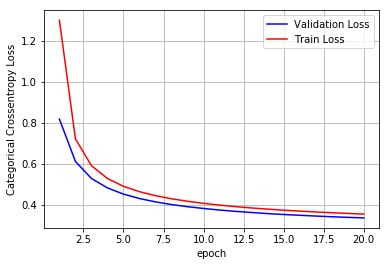

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [0]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 42us/step - loss: 2.2708 - acc: 0.2169 - val_loss: 2.2197 - val_acc: 0.2768
Epoch 2/20
60000/60000 [==============================] - 2s 42us/step - loss: 2.1739 - acc: 0.4237 - val_loss: 2.1143 - val_acc: 0.4877
Epoch 3/20
60000/60000 [==============================] - 2s 42us/step - loss: 2.0506 - acc: 0.5485 - val_loss: 1.9659 - val_acc: 0.5524
Epoch 4/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.8796 - acc: 0.6135 - val_loss: 1.7673 - val_acc: 0.6481
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.6674 - acc: 0.6659 - val_loss: 1.5414 - val_acc: 0.7205
Epoch 6/20
 5376/60000 [=>............................] - ETA: 2s - loss: 1.5430 - acc: 0.698160000/60000 [==============================] - 2s 41us/step - loss: 1.4449 - acc: 0.7125 - val_loss: 1.3233 - val_acc: 0.7513
Epoch 7/20
60000/60000 [=====================

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.4582893396139145
Test accuracy: 0.8816


<IPython.core.display.Javascript object>

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


<h2>MLP + Sigmoid activation + ADAM </h2>

In [0]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.5308 - acc: 0.8636 - val_loss: 0.2550 - val_acc: 0.9259
Epoch 2/20
53120/60000 [=========================>....] - ETA: 0s - loss: 0.2244 - acc: 0.934060000/60000 [==============================] - 3s 51us/step - loss: 0.2205 - acc: 0.9351 - val_loss: 0.1946 - val_acc: 

Test score: 0.06385514608082886
Test accuracy: 0.9824


<IPython.core.display.Javascript object>


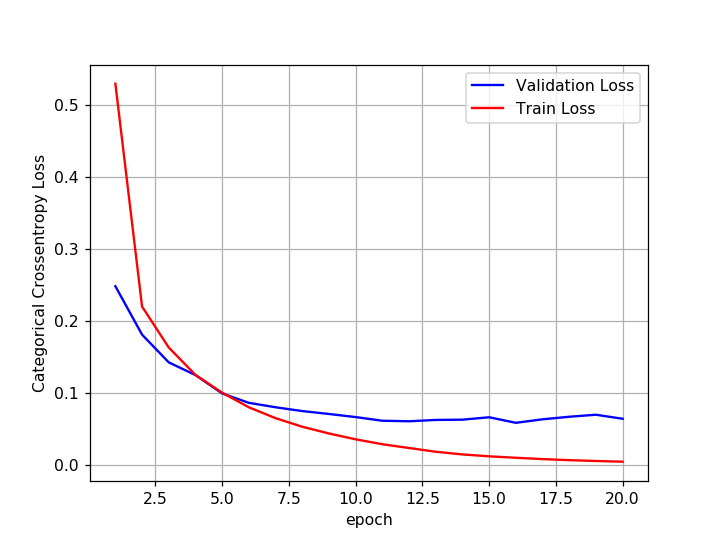

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


<h2> MLP + ReLU +SGD </h2>

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.7579 - acc: 0.7812 - val_loss: 0.3951 - val_acc: 0.8921
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3535 - acc: 0.8998 - val_loss: 0.3040 - val_acc: 0.9153
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2900 - acc: 0.9172 - val_loss: 0.2648 - val_acc: 0.9253
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.2558 - acc: 0.9269 - val_loss: 0.2393 - val_acc: 0.9316
Epoch 5/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.2324 - acc: 0.9340 - val_loss: 0.2210 - val_acc: 0.9371
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2144 - acc: 0.9391 - val_loss: 0.2072 - val_acc: 0.9400
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1995 - acc: 0.9443 - val_loss: 0.1957 - val_acc

Test score: 0.12405014228336513
Test accuracy: 0.9631


<IPython.core.display.Javascript object>


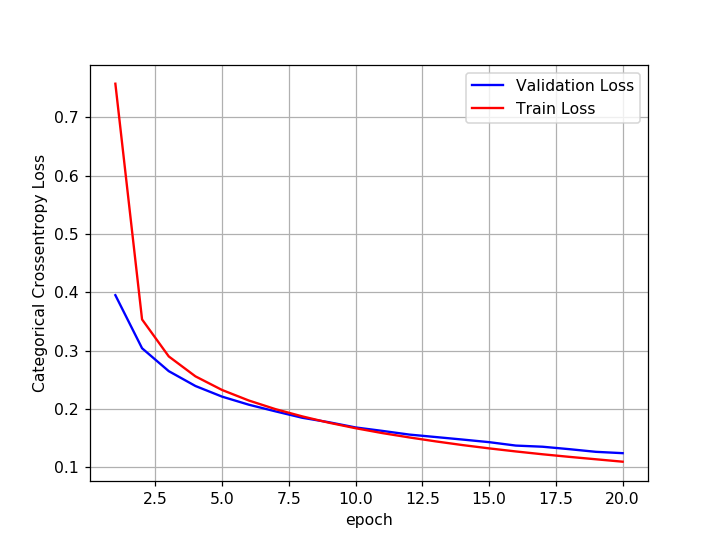

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


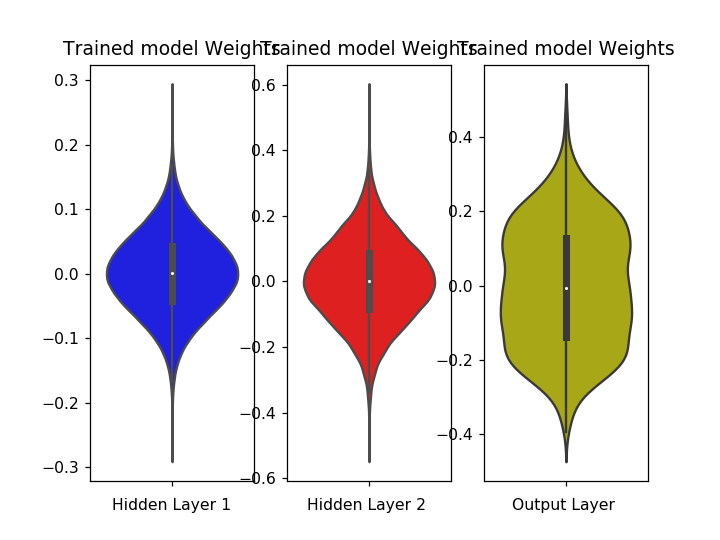

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [0]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.2341 - acc: 0.9295 - val_loss: 0.1165 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0878 - acc: 0.9729 - val_loss: 0.0883 - val_acc: 0.9720
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step

Test score: 0.10294274219236926
Test accuracy: 0.9805


<IPython.core.display.Javascript object>


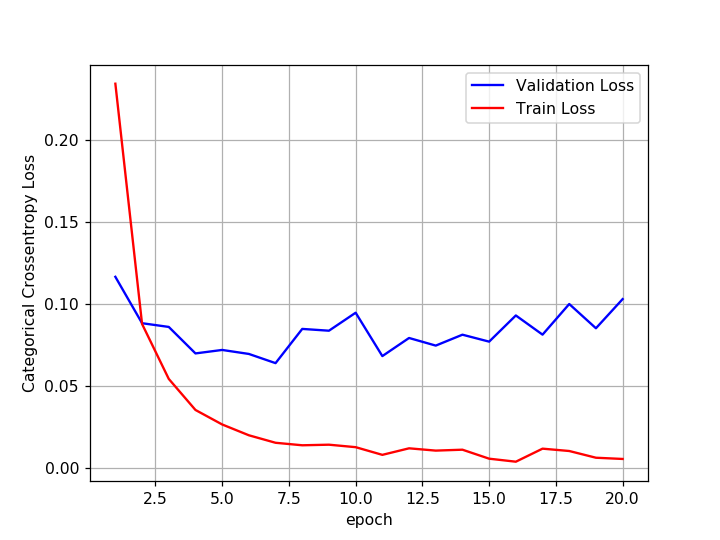

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


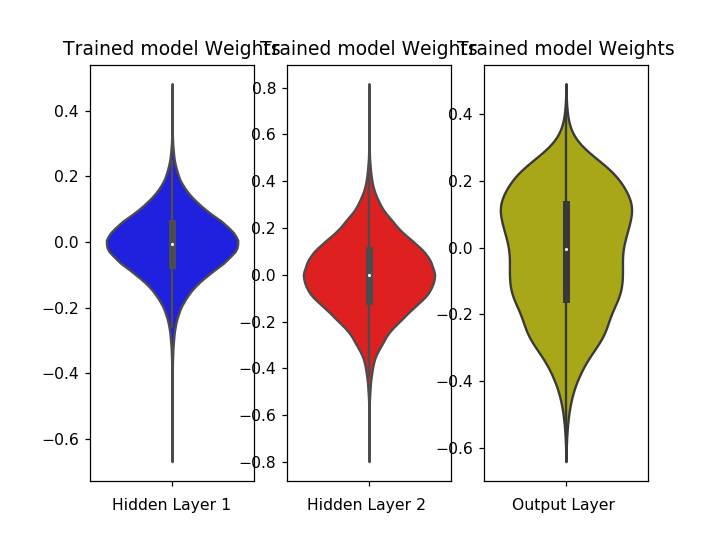

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3036 - acc: 0.9104 - val_loss: 0.2116 - val_acc: 0.9376
Epoch 2/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1747 - acc: 0.9483 - val_loss: 0.1670 - val_acc: 0.9505
Epoch 3/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.1367 - acc: 0.9599 - val_loss: 0.1451 - val_acc: 0.9567
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1134 - acc: 0.9666 - val_loss: 0.1335 - val_acc: 0.9603
Epoch 5/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.0949 - acc: 0.9703 - val_loss: 0.1325 - val_acc: 0.9589
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0802 - acc: 0.9758 - val_loss: 0.1139 - val_acc: 0.9652
Epoch 7/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0682 - acc: 0.9787 - val_loss: 0.1136

Test score: 0.10456635547156475
Test accuracy: 0.9732


<IPython.core.display.Javascript object>


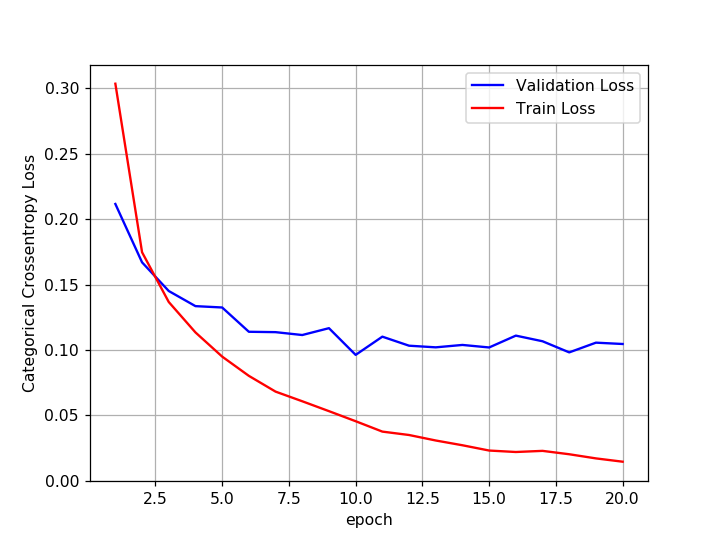

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


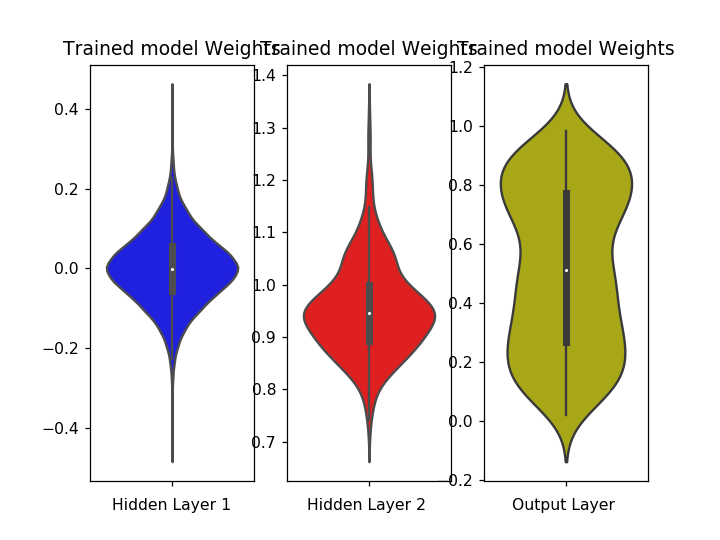

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.6612 - acc: 0.7951 - val_loss: 0.2860 - val_acc: 0.9166
Epoch 2/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.4250 - acc: 0.8710 - val_loss: 0.2545 - val_acc: 0.9252
Epoch 3/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.3841 - acc: 0.8846 - val_loss: 0.2391 - val_acc: 0.9298
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3551 - acc: 0.8927 - val_loss: 0.2279 - val_acc: 0.9325
Epoch 5/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.3355 - acc: 0.8986 - val_loss: 0.2127 - val_acc: 0.9356
Epoch 6/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.3234 - acc: 0.9031 - val_loss: 0.2029 - val_acc: 0.9387: 1s - loss:
Epoch 7/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.3068 - acc: 0.9077 - val_l

Test score: 0.1093290721397847
Test accuracy: 0.9679


<IPython.core.display.Javascript object>


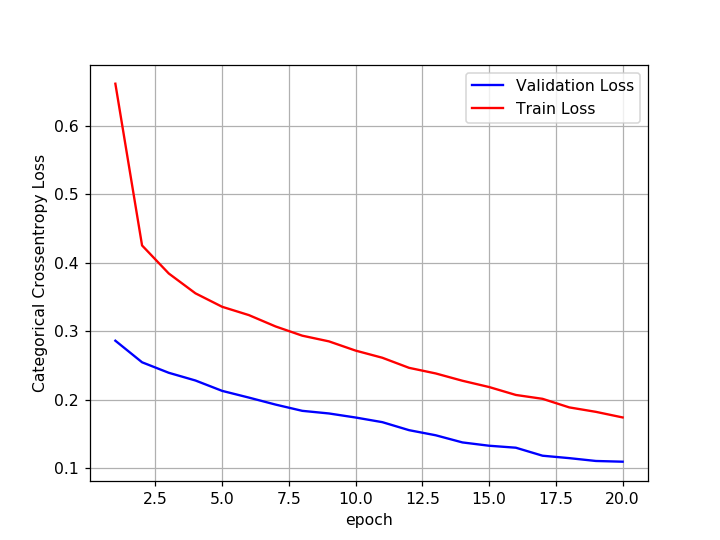

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


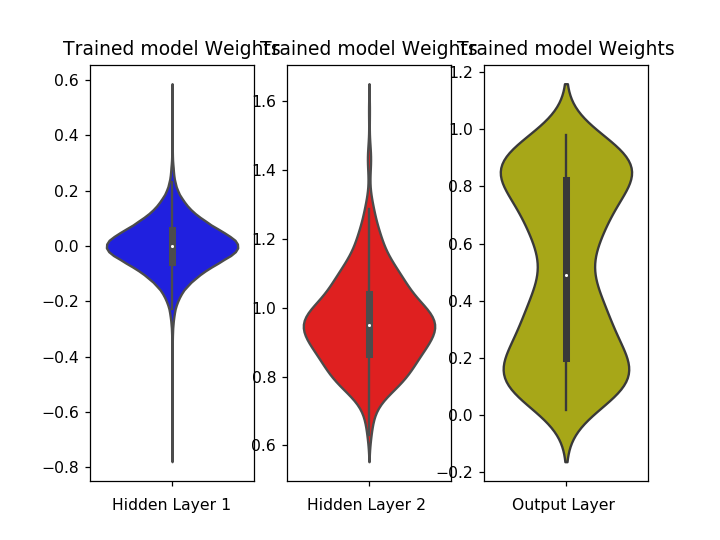

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975633 using {'activ': 'relu'}
0.974650 (0.001138) with: {'activ': 'sigmoid'}
0.975633 (0.002812) with: {'activ': 'relu'}


# Assignment

### 2 Hidden Layer W/O B-N and Dropout

In [47]:
# stddev = sqrt(2/ni)
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed = None)))


model.add(Dense(192, activation='relu', kernel_initializer= he_normal(seed = None)))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 612)               480420    
_________________________________________________________________
dense_54 (Dense)             (None, 192)               117696    
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1930      
Total params: 600,046
Trainable params: 600,046
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 93us/step - loss: 0.2106 - acc: 0.9377 - val_loss: 0.1014 - val_acc: 0.9682
Epoch 2/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.0794 - acc: 0.9754 - val_loss: 0.0840 - val_acc: 0.9734
Epoch 3/25
60000/60000 [==============================] - 2s 37us/step - loss: 0.0498 - acc: 0.9844 - val_loss: 0.0943 - val_acc: 0.9728
Epoch 4/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.0333 - acc: 0.9893 - val_loss: 0.0647 - val_acc: 0.9808
Epoch 5/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.0238 - acc: 0.9927 - val_loss: 0.0665 - val_acc: 0.9799
Epoch 6/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.0209 - acc: 0.9933 - val_loss: 0.0766 - val_acc: 0.9798
Epoch 7/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.0180 - acc: 0.9937 - val_loss: 0.0689 - val_acc

Test score: 0.11578446466811199
Test accuracy: 0.979


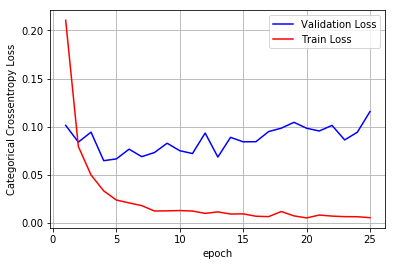

In [49]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

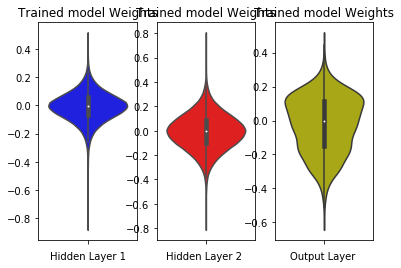

In [50]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 2 Hidden Layer Batch Normalization & Dropout

In [0]:
nb_epoch = 25
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.normalization import BatchNormalization
from math import sqrt
from keras.layers import Dropout
def best_hyperparameters(keep_prob):

    model = Sequential()

    model.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer = he_normal(seed = None)))
    model.add(BatchNormalization())
    model.add(Dropout(keep_prob))

    model.add(Dense(192, activation='relu', kernel_initializer = he_normal(seed=None)))
    model.add(BatchNormalization())
    model.add(Dropout(keep_prob))

    model.add(Dense(output_dim, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    
    return model

In [ ]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

keep_prob =[ 0.4 , 0.5 , 0.6]

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.initializers import he_normal

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(keep_prob=keep_prob)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid , verbose = 1 , cv = 5)
grid_result = grid.fit(X_train, Y_train)

In [41]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.981733 using {'keep_prob': 0.4}
0.981733 (0.001894) with: {'keep_prob': 0.4}
0.981683 (0.000959) with: {'keep_prob': 0.5}
0.981133 (0.001943) with: {'keep_prob': 0.6}


In [42]:
# stddev = sqrt(2/ni)
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer= he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(192, activation='relu', kernel_initializer= he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 612)               480420    
_________________________________________________________________
batch_normalization_34 (Batc (None, 612)               2448      
_________________________________________________________________
dropout_33 (Dropout)         (None, 612)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 192)               117696    
_________________________________________________________________
batch_normalization_35 (Batc (None, 192)               768       
_________________________________________________________________
dropout_34 (Dropout)         (None, 192)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                1930      
Total para

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 7s 118us/step - loss: 0.3405 - acc: 0.8954 - val_loss: 0.1211 - val_acc: 0.9620
Epoch 2/25
60000/60000 [==============================] - 4s 63us/step - loss: 0.1597 - acc: 0.9513 - val_loss: 0.0965 - val_acc: 0.9705
Epoch 3/25
60000/60000 [==============================] - 4s 63us/step - loss: 0.1214 - acc: 0.9626 - val_loss: 0.0787 - val_acc: 0.9744
Epoch 4/25
60000/60000 [==============================] - 4s 62us/step - loss: 0.1020 - acc: 0.9682 - val_loss: 0.0733 - val_acc: 0.9759
Epoch 5/25
60000/60000 [==============================] - 4s 64us/step - loss: 0.0871 - acc: 0.9726 - val_loss: 0.0690 - val_acc: 0.9785
Epoch 6/25
60000/60000 [==============================] - 4s 63us/step - loss: 0.0785 - acc: 0.9752 - val_loss: 0.0633 - val_acc: 0.9808
Epoch 7/25
60000/60000 [==============================] - 4s 63us/step - loss: 0.0692 - acc: 0.9781 - val_loss: 0.0618 - val_ac

Test score: 0.054112988726067124
Test accuracy: 0.9856


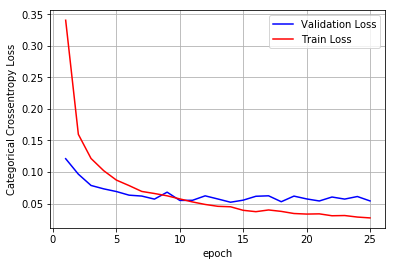

In [44]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

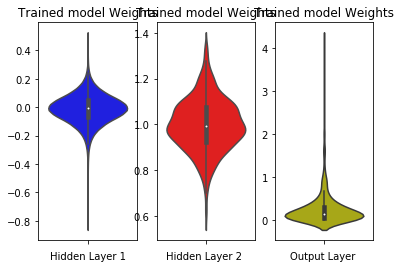

In [46]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3 Hidden Layer W/O B-N and Dropout

In [52]:
# stddev = sqrt(2/ni)
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer= he_normal(seed = None)))


model.add(Dense(192, activation='relu', kernel_initializer= he_normal(seed = None)))

model.add(Dense(62, activation='relu', kernel_initializer= he_normal(seed = None)))
model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 612)               480420    
_________________________________________________________________
dense_57 (Dense)             (None, 192)               117696    
_________________________________________________________________
dense_58 (Dense)             (None, 62)                11966     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                630       
Total params: 610,712
Trainable params: 610,712
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 93us/step - loss: 0.2238 - acc: 0.9332 - val_loss: 0.1162 - val_acc: 0.9638
Epoch 2/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.0834 - acc: 0.9748 - val_loss: 0.0815 - val_acc: 0.9747
Epoch 3/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.0551 - acc: 0.9828 - val_loss: 0.0711 - val_acc: 0.9785
Epoch 4/25
60000/60000 [==============================] - 2s 40us/step - loss: 0.0390 - acc: 0.9879 - val_loss: 0.0641 - val_acc: 0.9793
Epoch 5/25
60000/60000 [==============================] - 2s 40us/step - loss: 0.0307 - acc: 0.9903 - val_loss: 0.0735 - val_acc: 0.9782
Epoch 6/25
60000/60000 [==============================] - 2s 40us/step - loss: 0.0231 - acc: 0.9924 - val_loss: 0.0660 - val_acc: 0.9823
Epoch 7/25
60000/60000 [==============================] - 2s 40us/step - loss: 0.0201 - acc: 0.9934 - val_loss: 0.0872 - val_acc

Test score: 0.08263659398391089
Test accuracy: 0.9847


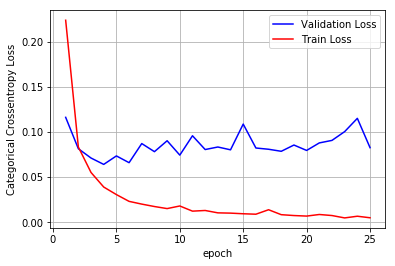

In [54]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

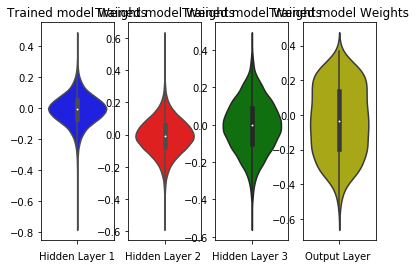

In [63]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3 Hidden Layer Batch Normalization & Dropout

In [0]:
nb_epoch = 25
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.normalization import BatchNormalization
from math import sqrt
from keras.layers import Dropout
def best_hyperparameters(keep_prob):

    model = Sequential()

    model.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer = he_normal(seed = None)))
    model.add(BatchNormalization())
    model.add(Dropout(keep_prob))

    model.add(Dense(192, activation='relu', kernel_initializer = he_normal(seed=None)))
    model.add(BatchNormalization())
    model.add(Dropout(keep_prob))
    
    model.add(Dense(62, activation='relu', kernel_initializer = he_normal(seed=None)))
    model.add(BatchNormalization())
    model.add(Dropout(keep_prob))

    model.add(Dense(output_dim, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    
    return model

In [57]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

keep_prob =[ 0.4 , 0.5 , 0.6]

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.initializers import he_normal

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(keep_prob=keep_prob)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid , verbose = 1 , cv = 5)
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 22.2min finished


In [58]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.981200 using {'keep_prob': 0.5}
0.980783 (0.001852) with: {'keep_prob': 0.4}
0.981200 (0.002073) with: {'keep_prob': 0.5}
0.979917 (0.001602) with: {'keep_prob': 0.6}


In [60]:
# stddev = sqrt(2/ni)
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer = he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(192, activation='relu', kernel_initializer = he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
    
model.add(Dense(62, activation='relu', kernel_initializer = he_normal(seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 612)               480420    
_________________________________________________________________
batch_normalization_85 (Batc (None, 612)               2448      
_________________________________________________________________
dropout_84 (Dropout)         (None, 612)               0         
_________________________________________________________________
dense_126 (Dense)            (None, 192)               117696    
_________________________________________________________________
batch_normalization_86 (Batc (None, 192)               768       
_________________________________________________________________
dropout_85 (Dropout)         (None, 192)               0         
_________________________________________________________________
dense_127 (Dense)            (None, 62)                11966     
__________

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 207us/step - loss: 0.6116 - acc: 0.8140 - val_loss: 0.1674 - val_acc: 0.9490
Epoch 2/25
60000/60000 [==============================] - 5s 77us/step - loss: 0.2661 - acc: 0.9246 - val_loss: 0.1284 - val_acc: 0.9610
Epoch 3/25
60000/60000 [==============================] - 5s 78us/step - loss: 0.2052 - acc: 0.9428 - val_loss: 0.1161 - val_acc: 0.9659
Epoch 4/25
60000/60000 [==============================] - 5s 79us/step - loss: 0.1697 - acc: 0.9520 - val_loss: 0.1036 - val_acc: 0.9704
Epoch 5/25
60000/60000 [==============================] - 5s 80us/step - loss: 0.1519 - acc: 0.9570 - val_loss: 0.0874 - val_acc: 0.9747
Epoch 6/25
60000/60000 [==============================] - 5s 81us/step - loss: 0.1328 - acc: 0.9627 - val_loss: 0.0805 - val_acc: 0.9750
Epoch 7/25
60000/60000 [==============================] - 5s 79us/step - loss: 0.1237 - acc: 0.9654 - val_loss: 0.0773 - val_a

Test score: 0.05496101515115006
Test accuracy: 0.9843


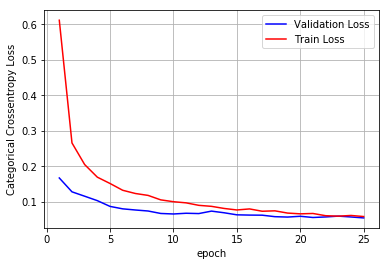

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

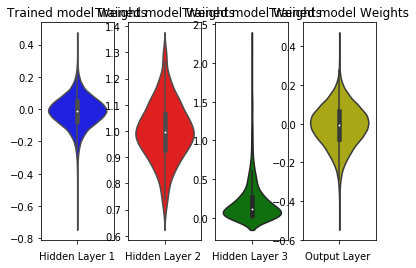

In [64]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5 Hidden Layer W/O B-N and Dropout

In [68]:
# stddev = sqrt(2/ni)
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer= he_normal(seed = None )))

model.add(Dense(352, activation='relu', kernel_initializer=he_normal(seed = None)))

model.add(Dense(192, activation='relu', kernel_initializer=he_normal(seed = None)))

model.add(Dense(99, activation='relu', kernel_initializer=he_normal(seed = None)))

model.add(Dense(28, activation='relu', kernel_initializer=he_normal(seed = None)))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 612)               480420    
_________________________________________________________________
dense_130 (Dense)            (None, 352)               215776    
_________________________________________________________________
dense_131 (Dense)            (None, 192)               67776     
_________________________________________________________________
dense_132 (Dense)            (None, 99)                19107     
_________________________________________________________________
dense_133 (Dense)            (None, 28)                2800      
_________________________________________________________________
dense_134 (Dense)            (None, 10)                290       
Total params: 786,169
Trainable params: 786,169
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 180us/step - loss: 0.2379 - acc: 0.9275 - val_loss: 0.1057 - val_acc: 0.9677
Epoch 2/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0917 - acc: 0.9723 - val_loss: 0.0948 - val_acc: 0.9699
Epoch 3/25
60000/60000 [==============================] - 3s 53us/step - loss: 0.0612 - acc: 0.9810 - val_loss: 0.0872 - val_acc: 0.9732
Epoch 4/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.0459 - acc: 0.9857 - val_loss: 0.0689 - val_acc: 0.9793
Epoch 5/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0387 - acc: 0.9876 - val_loss: 0.0812 - val_acc: 0.9764
Epoch 6/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0293 - acc: 0.9906 - val_loss: 0.0846 - val_acc: 0.9755
Epoch 7/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0271 - acc: 0.9915 - val_loss: 0.0736 - val_a

Test score: 0.13062057571249233
Test accuracy: 0.9766


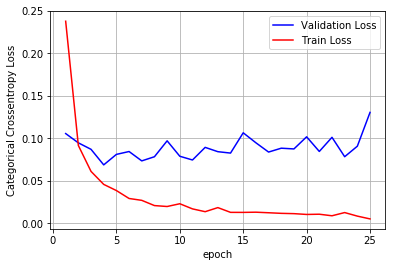

In [70]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

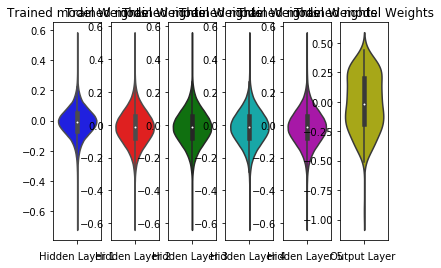

In [73]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='c')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5 Hidden Layer Batch Normalization & Dropout

In [0]:
nb_epoch = 25
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.normalization import BatchNormalization
from math import sqrt
from keras.layers import Dropout
def best_hyperparameters(keep_prob):

    model = Sequential()

    model.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer= he_normal(seed = None )))

    model.add(Dense(352, activation='relu', kernel_initializer=he_normal(seed = None)))

    model.add(Dense(192, activation='relu', kernel_initializer=he_normal(seed = None)))

    model.add(Dense(99, activation='relu', kernel_initializer=he_normal(seed = None)))

    model.add(Dense(28, activation='relu', kernel_initializer=he_normal(seed = None)))

    model.add(Dense(output_dim, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    
    return model

In [75]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

keep_prob =[ 0.4 , 0.5 , 0.6]

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.initializers import he_normal

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(keep_prob=keep_prob)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid , verbose = 1 , cv = 5)
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 17.0min finished


In [76]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977850 using {'keep_prob': 0.4}
0.977850 (0.001585) with: {'keep_prob': 0.4}
0.977600 (0.002374) with: {'keep_prob': 0.5}
0.976700 (0.001507) with: {'keep_prob': 0.6}


In [77]:
# stddev = sqrt(2/ni)
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer= he_normal(seed = None )))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(352, activation='relu', kernel_initializer=he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(192, activation='relu', kernel_initializer=he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(99, activation='relu', kernel_initializer=he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(28, activation='relu', kernel_initializer=he_normal(seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 612)               480420    
_________________________________________________________________
batch_normalization_88 (Batc (None, 612)               2448      
_________________________________________________________________
dropout_87 (Dropout)         (None, 612)               0         
_________________________________________________________________
dense_232 (Dense)            (None, 352)               215776    
_________________________________________________________________
batch_normalization_89 (Batc (None, 352)               1408      
_________________________________________________________________
dropout_88 (Dropout)         (None, 352)               0         
_________________________________________________________________
dense_233 (Dense)            (None, 192)               67776     
__________

In [78]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 17s 279us/step - loss: 0.8619 - acc: 0.7412 - val_loss: 0.2027 - val_acc: 0.9432
Epoch 2/25
60000/60000 [==============================] - 7s 110us/step - loss: 0.3182 - acc: 0.9189 - val_loss: 0.1455 - val_acc: 0.9599
Epoch 3/25
60000/60000 [==============================] - 7s 114us/step - loss: 0.2378 - acc: 0.9413 - val_loss: 0.1278 - val_acc: 0.9664
Epoch 4/25
60000/60000 [==============================] - 7s 116us/step - loss: 0.1895 - acc: 0.9530 - val_loss: 0.1057 - val_acc: 0.9706
Epoch 5/25
60000/60000 [==============================] - 7s 114us/step - loss: 0.1675 - acc: 0.9581 - val_loss: 0.1009 - val_acc: 0.9726
Epoch 6/25
60000/60000 [==============================] - 7s 113us/step - loss: 0.1558 - acc: 0.9609 - val_loss: 0.0891 - val_acc: 0.9753
Epoch 7/25
60000/60000 [==============================] - 6s 108us/step - loss: 0.1389 - acc: 0.9649 - val_loss: 0.0776 -

Test score: 0.06903501920294948
Test accuracy: 0.9834


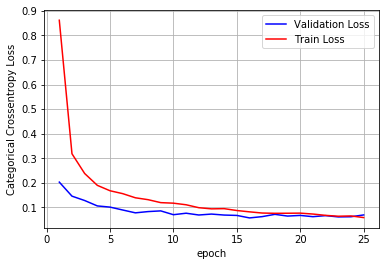

In [79]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

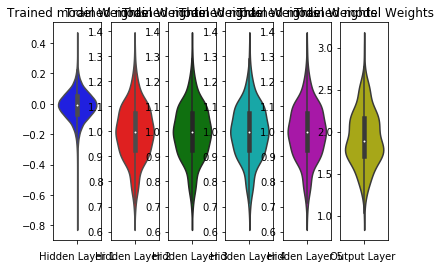

In [80]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='c')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Conclusion

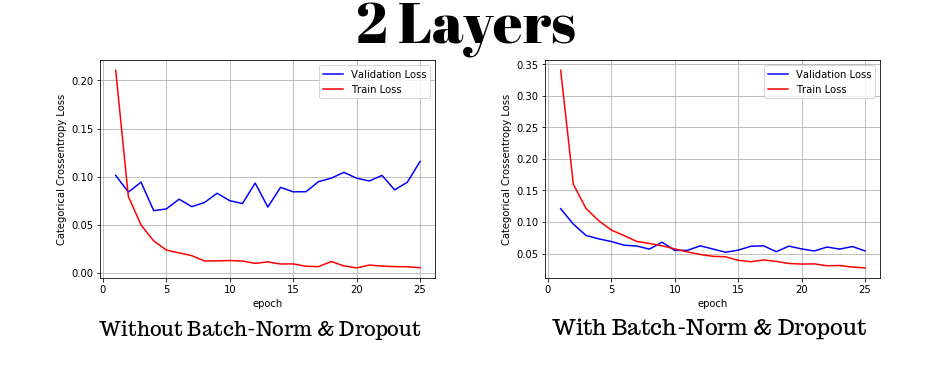

In [7]:
from IPython.display import Image
Image("2 Layers.png")

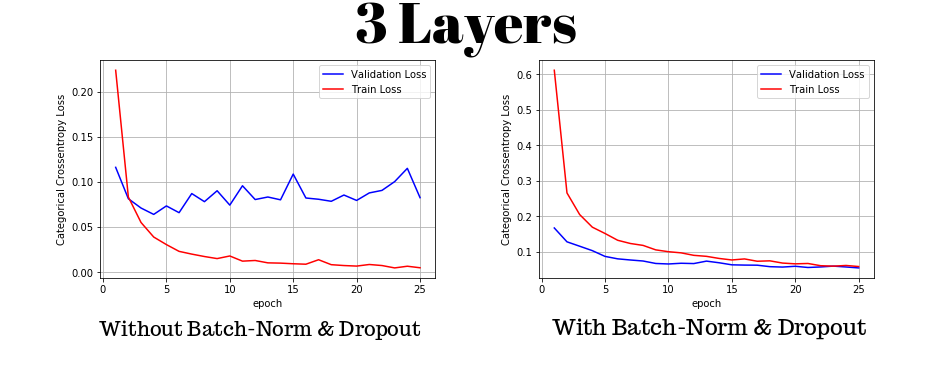

In [5]:
Image("3 Layers.png")

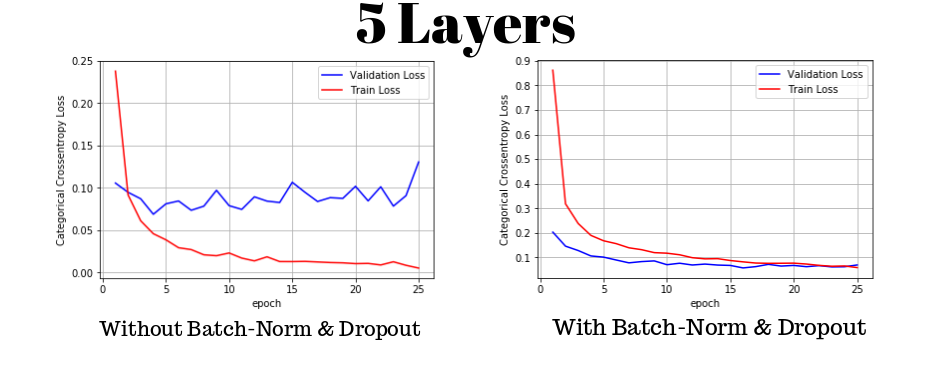

In [6]:
Image("5 Layers.png")

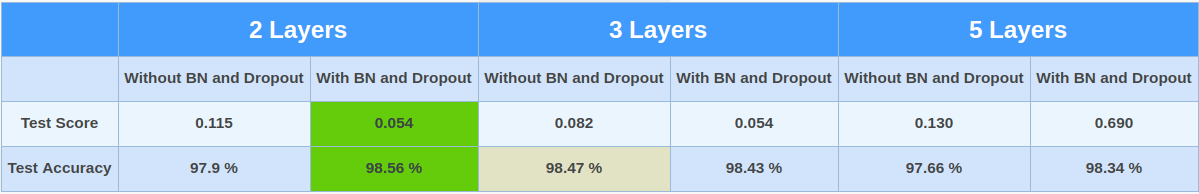

In [13]:
Image("image.png")

<b>
    <ol>
        <li> Here , we trained our models with & without Batch Normalization And Dropout
            <li> As we can see when we do not add batch normalization and dropout<br>
                There is a difference between validation loss and test loss
                <li>But As soon as we add Batch Normalization and Dropout<br> The Loss minimizes between validaton loss ans test loss
                    <li> Therefore , we can improve our model bt adding Batch Normalization And Dropout
                        <li> Here , We also trained our model using different hidden layers like 
                            <br> ----> 2 , 3 , 5 Hidden Layers
                            <li>Maximum accuracy can be seen with 2 Hidden Layers With Batch Normalization and Dropout
                                <li> Here , our optimizer was Adam Optimizer
                                    <li> Or Activation Function was ReLU Activation
                                        <li> Our Loss was Cross Entropy Loss
    </ol>